In [60]:
from sklearn.datasets import load_iris
data = load_iris()

X, y = data.data, data.target
print(list(data.feature_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [61]:
print(list(list(data.target_names)))

['setosa', 'versicolor', 'virginica']


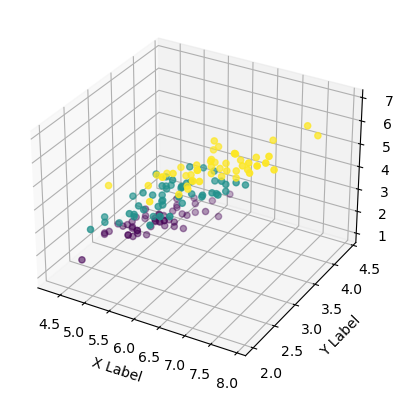

In [62]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

As seen, initial plot of the data looks quite difficult to understand and to work with.

C:\Users\Max\Documents\hw's_sigmoid\PCA.py:49: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  self.matrix_w = np.hstack((self.eig_pairs[i][1].reshape(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


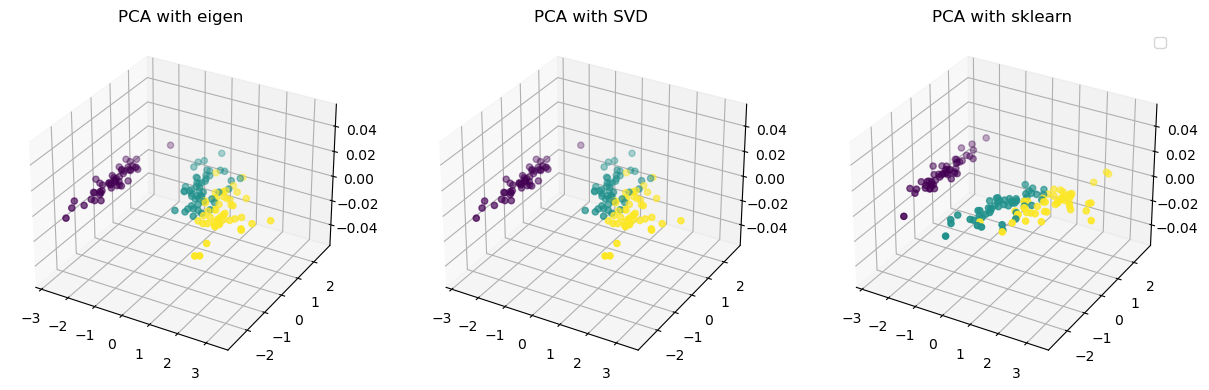

In [77]:
from sklearn.preprocessing import StandardScaler
from PCA import myPCA
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

PCA_eigen = myPCA(method='eigen')
PCA_svd = myPCA(method='svd')
pca = PCA(n_components='mle')

pca.fit(X)
PCA_eigen.fit(X_sc)
PCA_svd.fit(X_sc)


X_PCA_eigen = PCA_eigen.transform(X_sc)
X_PCA_svd = PCA_svd.transform(X_sc)
X_PCA = pca.fit_transform(X_sc)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131,projection='3d')
ax2 = fig.add_subplot(132,projection='3d')
ax3 = fig.add_subplot(133,projection='3d')
target_names = data.target_names


ax1.scatter(X_PCA_eigen[:,0], X_PCA_eigen[:,1], c=y)
ax1.set_title('PCA with eigen')

ax2.scatter(X_PCA_svd[:,0], X_PCA_svd[:,1], c=y)
ax2.set_title('PCA with SVD')

ax3.scatter(X_PCA[:,0], X_PCA[:,1], c=y)
ax3.set_title('PCA with sklearn')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.show()

After PCA, it can be seen that the data has been reduced and also cleaned and separated. It also can be seen that the results based on the algorithm from SMLH are a bit different from the results based on the algorithm from sklearn. We can assume, that results are different because of different algorithms for eigenvectors used (different sign convention).

Text(0.5, 1.0, 'PCA with sklearn')

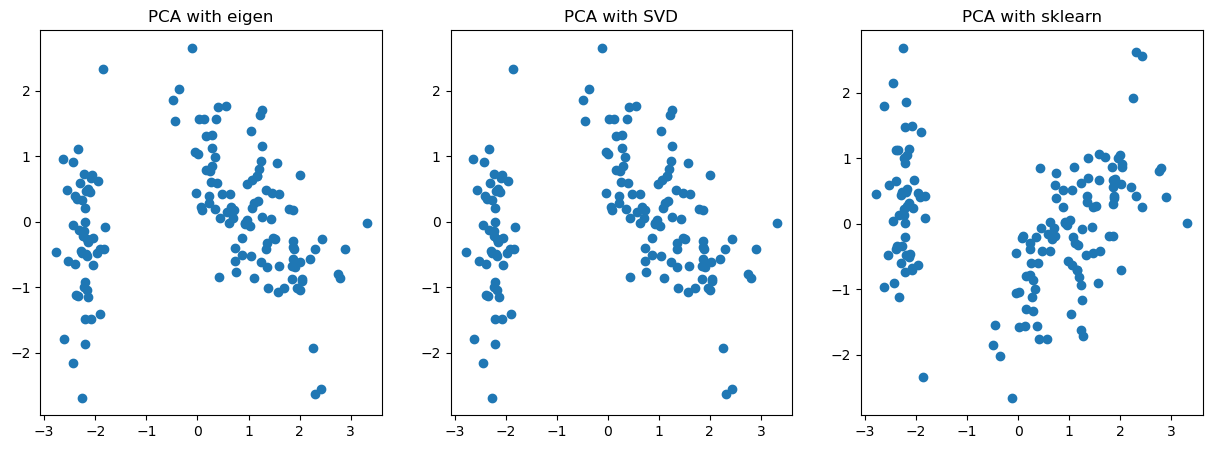

In [71]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(X_PCA_eigen[:,0], X_PCA_eigen[:,1])
ax1.set_title('PCA with eigen')

ax2.scatter(X_PCA_svd[:,0], X_PCA_svd[:,1])
ax2.set_title('PCA with SVD')

ax3.scatter(X_PCA[:,0], X_PCA[:,1])
ax3.set_title('PCA with sklearn')

[0.92461872]


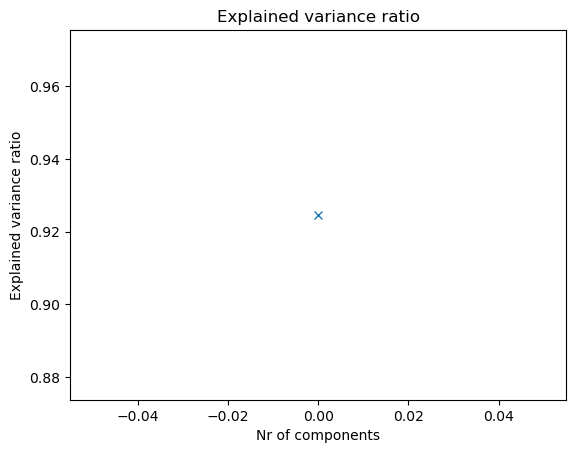

In [85]:
PCA_evr = PCA(n_components=1)
PCA_evr.fit(X)

print(PCA_evr.explained_variance_ratio_)

plt.plot(PCA_evr.explained_variance_ratio_, 'x-')
plt.title('Explained variance ratio')
plt.xlabel('Nr of components')
plt.ylabel('Explained variance ratio')
plt.show()

Thus, can be concluded that the explained variance ratio is quite good (92.46%). This means that the accuracy of the initial dataset won't be lost.

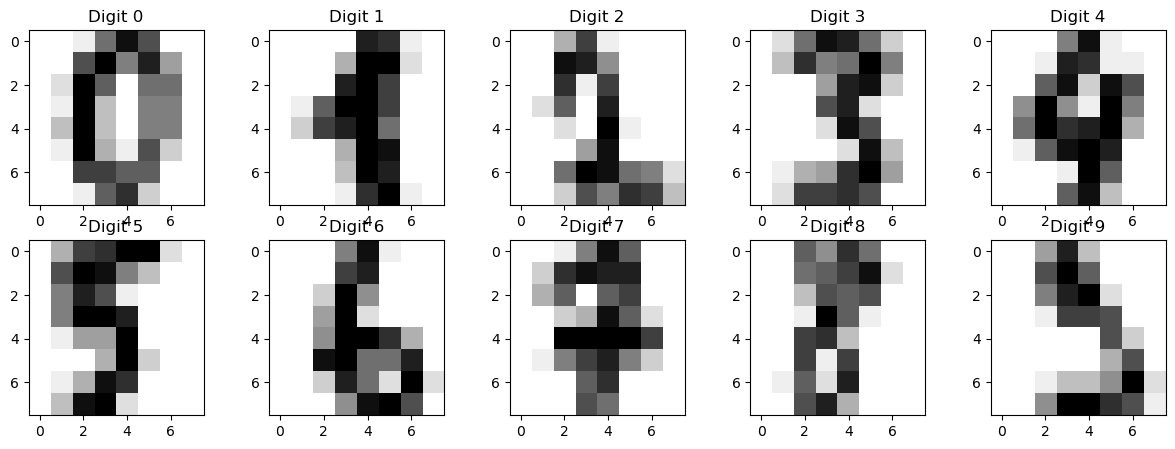

In [88]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i+10], cmap='binary')
    ax.set_title(f"Digit {i}")

plt.show()

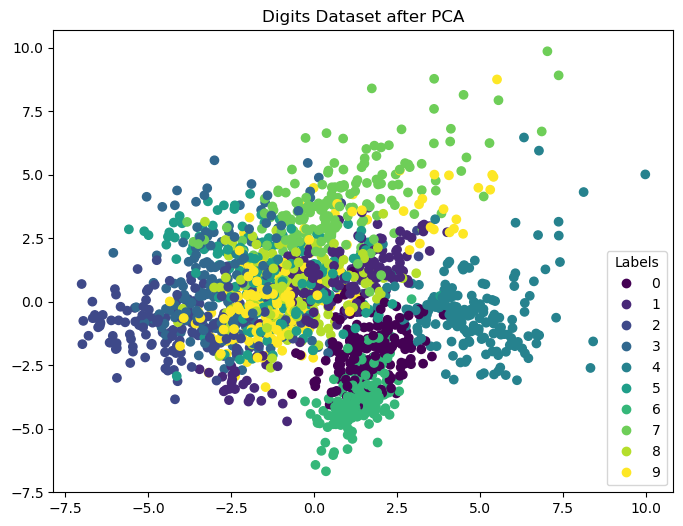

In [97]:
pca = PCA(n_components=2)

scaler = StandardScaler()
X_sc = scaler.fit_transform(digits.data)

pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target)
legend = plt.legend(*scatter.legend_elements(), title='Labels')
plt.title('Digits Dataset after PCA')

plt.show()

Text(0.5, 1.0, 'Digits Dataset before PCA')

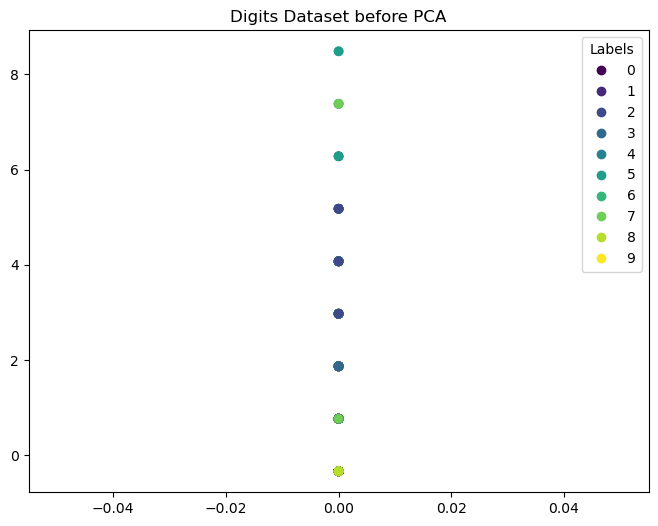

In [98]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_sc[:, 0], X_sc[:, 1], c=digits.target)
legend = plt.legend(*scatter.legend_elements(), title='Labels')
plt.title('Digits Dataset before PCA')

As a conclusion, if we compare Digits dataset before and after PCA, we can see that the data after PCA is more structured and linearly divided than before PCA where we see only 10 points. It can be concluded that the results are pretty good.